In [1]:
import torch

In [2]:
torch.__version__

'1.12.0'

In [3]:
a = torch.tensor([1, 2, 3, 4], dtype=torch.int32)

In [24]:
torch.tensor(1)

tensor(1)

In [14]:
a, a.dtype, a.type()

(tensor([1, 2, 3, 4], dtype=torch.int32), torch.int32, 'torch.IntTensor')

In [15]:
a.storage_type()

torch.IntStorage

In [16]:
fTensor = torch.FloatTensor([1, 2, 3])
fTensor, fTensor.type()

(tensor([1., 2., 3.]), 'torch.FloatTensor')

In [26]:
torch.DoubleTensor([1,2,3])

tensor([1., 2., 3.], dtype=torch.float64)

In [27]:
c = torch.tensor([4, 1, 2, 3, 4])
print(c.dtype)
d = c.type(torch.float32)
d

torch.int64


tensor([4., 1., 2., 3., 4.])

In [35]:
a.size(), a.shape

(torch.Size([4]), torch.Size([4]))

In [30]:
a.ndimension()

1

In [31]:
# same storage => use view
a_col = a.view(4, -1)
a_col

tensor([[1],
        [2],
        [3],
        [4]], dtype=torch.int32)

In [32]:
a.reshape(4,-1)

tensor([[1],
        [2],
        [3],
        [4]], dtype=torch.int32)

In [69]:
c = a
id(a), id(c)

(5084938304, 5084938304)

In [42]:
id(a), id(a.reshape(4,-1)), id(a.clone())

(5084938304, 5085422832, 5085567392)

In [43]:
torch.rand(2, 4)

tensor([[0.8374, 0.0669, 0.5258, 0.3621],
        [0.1934, 0.6940, 0.2757, 0.6731]])

In [45]:
torch.arange(1, 5, dtype=torch.float32)

tensor([1., 2., 3., 4.])

In [48]:
torch.randn(5)

tensor([-1.6291,  1.5298,  0.0038,  0.7864, -0.2461])

In [5]:
a1 = torch.randint(3,10,(3,5))
a2 = a1.clone()
a2[2,0] = 5

In [6]:
torch.eq(a1,a2) # same dimensions

tensor([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True]])

In [8]:
a = torch.arange(1,10).view(3,-1)
a

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [9]:
a.device

device(type='cpu')

In [10]:
torch.cuda.is_available()

False

In [ ]:
torch.cuda.get_device_name()

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
# the CUDA tool is a development environment for creating high performance GPU accelerated aplications
# that for this you need an NVIDIA GPU on your machine
a = a.to('cuda')

In [47]:
# inplace operations just change the content of the tensor and doesn't copy it
X = torch.arange(-3, 3, step=0.1)
Y = X * 3
print(id(Y))
Y += 0.1 * torch.randn(Y.shape)
print(id(Y))

5085666336
5085666336


In [49]:
X = torch.arange(-3, 3, step=0.1)
Y = X * 3
print(id(Y))
Y = Y + 0.1 * torch.randn(Y.shape) # use Y.data = Y + 0.1 * torch.randn(Y.shape)
print(id(Y))

5085665456
5085215936


# numpy and pandas relationship

In [50]:
import numpy as np
import pandas as pd

In [51]:
numpy_array = np.array([1, 2, 3, 4, 5])
numpy_array

array([1, 2, 3, 4, 5])

In [52]:
torch_tensor = torch.from_numpy(numpy_array)
torch_tensor

tensor([1, 2, 3, 4, 5])

In [53]:
backToNumpyArray = torch_tensor.numpy()
backToNumpyArray

array([1, 2, 3, 4, 5])

In [54]:
pandas_series = pd.Series([1, 2, 3, 4])
pandas_series

0    1
1    2
2    3
3    4
dtype: int64

In [56]:
pandas_series.values

array([1, 2, 3, 4])

In [57]:
pandasToTorch = torch.from_numpy(pandas_series.values)
pandasToTorch

tensor([1, 2, 3, 4])

In [58]:
df = pd.DataFrame({'a': [11, 21, 31], 'b': [12, 22, 312]})
df

,a,b
0,11,12
1,21,22
2,31,312


In [59]:
df['a']

0    11
1    21
2    31
Name: a, dtype: int64

In [61]:
print("Pandas Dataframe to numpy: \n", df.values)

Pandas Dataframe to numpy: 
 [[ 11  12]
 [ 21  22]
 [ 31 312]]


In [62]:
torch.from_numpy(df.values)

tensor([[ 11,  12],
        [ 21,  22],
        [ 31, 312]])

In [63]:
torch.tensor([1, 2, 3, 4]).tolist()

[1, 2, 3, 4]

In [64]:
a

tensor([1, 2, 3, 4], dtype=torch.int32)

In [66]:
a[0]

tensor(1, dtype=torch.int32)

In [67]:
a[0].item()

1

In [71]:
a[1:3] = torch.tensor([100, 200])
a

tensor([  1, 100, 200,   4], dtype=torch.int32)

# basic operations

In [72]:
# in addition, both tensors should be from a same type and on a same device
u = torch.tensor([1, 0])
v = torch.tensor([0, 1])
u + v

tensor([1, 1])

In [73]:
torch.tensor([1,2,3], device='cpu')

tensor([1, 2, 3])

In [75]:
2 * u

tensor([2, 0])

In [76]:
u + 1

tensor([2, 1])

In [80]:
(u + 2) * v

tensor([0, 2])

In [81]:
torch.dot(u + 2, v)

tensor(2)

In [83]:
a = torch.tensor([1,2,3,4], dtype=torch.float32)
a.mean(), a.max()

(tensor(2.5000), tensor(4.))

### functions -> give a tensor and apply function on each element then return the tensor

In [84]:
d = torch.tensor([0, np.pi / 2, np.pi])
d

tensor([0.0000, 1.5708, 3.1416])

In [85]:
s = torch.sin(d)
s

tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])

In [90]:
torch.arange(1,3, step=0.5)

tensor([1.0000, 1.5000, 2.0000, 2.5000])

In [92]:
torch.linspace(-2, 2, steps=5)

tensor([-2., -1.,  0.,  1.,  2.])

In [93]:
x = torch.linspace(0, 2 * np.pi, steps=100)
y = torch.sin(x)

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

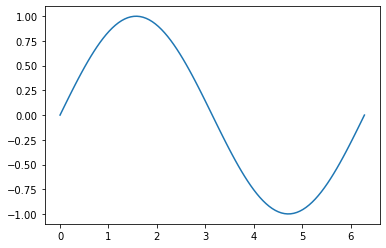

In [95]:
plt.plot(x.numpy(), y.numpy())

In [96]:
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [98]:
a.ndimension(), a.shape, a.numel()

(2, torch.Size([3, 3]), 9)

In [99]:
a[0][1], a[0, 1]

(tensor(2), tensor(2))

In [100]:
a[0, 0:2]

tensor([1, 2])

In [101]:
a[0, :]

tensor([1, 2, 3])

In [102]:
a[:-1, 2]

tensor([3, 6])

In [104]:
# attention
a[1:3, 1], a[1:3][1]

(tensor([5, 8]), tensor([7, 8, 9]))

In [105]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
a, b

(tensor([[1, 2],
         [3, 4]]),
 tensor([[5, 6],
         [7, 8]]))

In [106]:
a + b

tensor([[ 6,  8],
        [10, 12]])

In [107]:
# element wise multiplication or hadamard product
a * b

tensor([[ 5, 12],
        [21, 32]])

In [108]:
a @ b

tensor([[19, 22],
        [43, 50]])

In [109]:
# matrix multiplication
torch.mm(a, b)

tensor([[19, 22],
        [43, 50]])

In [110]:
a.t()

tensor([[1, 3],
        [2, 4]])

# derivatives

In [123]:
# x = torch.tensor(3, requires_grad=True, dtype=torch.int64)
x = torch.tensor(3, requires_grad=True, dtype=torch.float32)
x

tensor(3., requires_grad=True)

In [124]:
y = x ** 2

y.backward()

In [125]:
# the derivative of y concerning x
x.grad

tensor(6.)

In [126]:
y.data

tensor(9.)

In [129]:
y

tensor(9., grad_fn=<PowBackward0>)

In [130]:
y.grad_fn, y.is_leaf, y.requires_grad

(<PowBackward0 at 0x132746850>, False, True)

In [131]:
x.is_leaf

True

The  method <code> detach()</code>  excludes further tracking of operations in the graph, and therefore the subgraph will not record operations. This allows us to then convert the tensor to a numpy array.

In [145]:
b = x.detach()
id(a) , id(b), x.requires_grad, b.requires_grad

(5141288576, 5141684928, True, False)

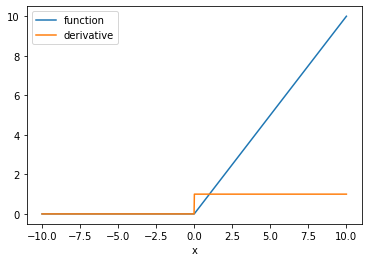

In [146]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-10, 10, 1000, requires_grad=True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label='function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='derivative')
plt.xlabel('x')
plt.legend()
plt.show()

# Autograd

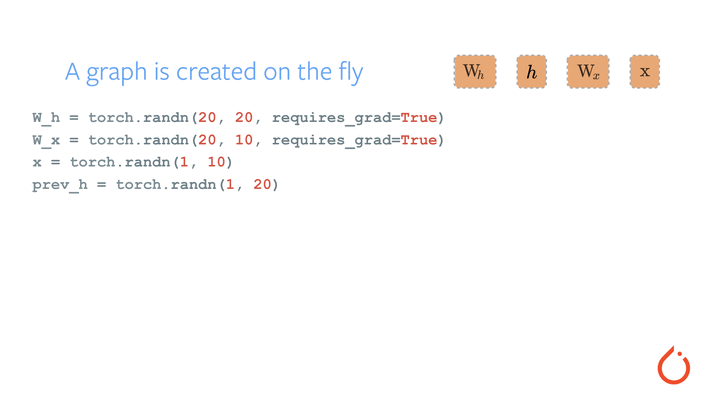

# use .sum()

In [38]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [39]:
Q = 3*a**3 - b**2
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [40]:
# run this cell results in an error
# Q.backward()

In [41]:
Q.sum().backward()
# or explicitly say the dQ/dQ = 1
# external_grad = torch.tensor([1., 1.])
# Q.backward(gradient=external_grad)

In [42]:
a.grad

tensor([36., 81.])

In [43]:
b.grad

tensor([-12.,  -8.])

### Important

In [44]:
w = torch.tensor(4.0, requires_grad=True)
x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float64, requires_grad=True)
Y = w * x
loss = Y
# sum doesn't actually apply when we have a vector of size more than 1 like x, just calculate derivatives according to different values of x and saves them in .grad
# but when we have a single valued tensor like w, sum applies and .grad holds the sum of derivatives with different values of x
loss.sum().backward()

In [30]:
x.grad

tensor([[4.],
        [4.],
        [4.],
        [4.]], dtype=torch.float64)

In [48]:
w.grad

tensor(10.)

In [49]:
w = torch.tensor(3)
b = torch.tensor(5)

# vectorization

In [50]:
x = 2
w*x+b

tensor(11)

In [51]:
x = torch.tensor([1,2])
w*x+b

tensor([ 8, 11])

In [52]:
x = torch.tensor([[2],[3]])
w*x+b

tensor([[11],
        [14]])

# axis & dim

In [54]:
a = [i for i in range(6)]
a = torch.tensor(a).view(2,-1)
a

tensor([[0, 1, 2],
        [3, 4, 5]])

In [55]:
torch.concat([a,a,a], dim = 0)

tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])

In [56]:
torch.concat([a,a,a], dim = 1)

tensor([[0, 1, 2, 0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5, 3, 4, 5]])

In [57]:
a = torch.tensor([[1,2,3],[4,5,6],[7,9,8]])
a

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 9, 8]])

In [60]:
torch.argmax(a)

tensor(7)

In [61]:
torch.argmax(a,dim = 0)

tensor([2, 2, 2])

In [64]:
torch.argmax(a,dim = 0, keepdim=True)

tensor([[2, 2, 2]])

In [65]:
torch.argmax(a,dim = 1)

tensor([2, 2, 1])

In [66]:
torch.argmax(a,dim = 1, keepdim=True)

tensor([[2],
        [2],
        [1]])

# linear Regression

In [67]:
# Import Class Linear

from torch.nn import Linear

In [112]:
# Set random seed

torch.manual_seed(1)

In [113]:
# Create Linear Regression Model, and print out the parameters

lr = Linear(in_features=1, out_features=1, bias=True)
print("Parameters w and b: ", list(lr.parameters()))

Parameters w and b:  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [114]:
lr.state_dict()

OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])

In [115]:
print("Python dictionary: ", lr.state_dict())
print("keys: ", lr.state_dict().keys())
print("values: ", lr.state_dict().values())

Python dictionary:  OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[0.5153]]), tensor([-0.4414])])


In [116]:
print("weight:", lr.weight)
print("bias:", lr.bias)

weight: Parameter containing:
tensor([[0.5153]], requires_grad=True)
bias: Parameter containing:
tensor([-0.4414], requires_grad=True)


In [117]:
# change model parameters
lr.weight.data = torch.tensor([[0.2]])

In [118]:
lr.state_dict()

OrderedDict([('weight', tensor([[0.2000]])), ('bias', tensor([-0.4414]))])

In [119]:
# Make the prediction at x = [[1.0]]
# can't pass x = [1.0] because model parameters are 2D.
# we should pass inputs at least 2D or higher like x = [[[1.0]]]

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[-0.2414]], grad_fn=<AddmmBackward0>)


In [120]:
# Create the prediction using linear model

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[-0.2414],
        [-0.0414]], grad_fn=<AddmmBackward0>)


# build custom modules

In [121]:
# Library for this section

from torch import nn

In [122]:
# Customize Linear Regression Class

class LR(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        # Inherit from parent
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [124]:
# Create the linear regression model. Print out the parameters.

lr = LR(1, 1)
print("The parameters: ", list(lr.parameters()))
print('-'*10)
print("Linear model: ", lr.linear)

The parameters:  [Parameter containing:
tensor([[-0.9414]], requires_grad=True), Parameter containing:
tensor([0.5997], requires_grad=True)]
----------
Linear model:  Linear(in_features=1, out_features=1, bias=True)


In [127]:
# Try our customize linear regression model with single input

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[-0.3417]], grad_fn=<AddmmBackward0>)


In [128]:
# Try our customize linear regression model with multiple input

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[-0.3417],
        [-1.2832]], grad_fn=<AddmmBackward0>)


In [129]:
lr.state_dict()

OrderedDict([('linear.weight', tensor([[-0.9414]])),
             ('linear.bias', tensor([0.5997]))])

In [130]:
lr

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

https://stackoverflow.com/questions/59234238/how-to-add-parameters-in-module-class-in-pytorch-custom-model

# training

In [131]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)

In [132]:
Y = -3 * X + 0.1 * torch.randn(X.size())

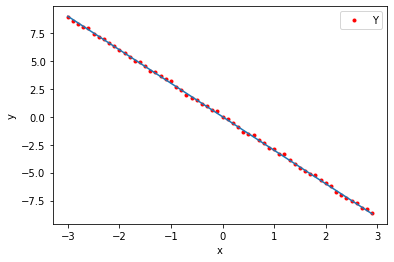

In [140]:
import matplotlib.pyplot as plt
plt.plot(X.numpy(), Y.numpy(), 'r.', label='Y')
plt.plot(X.numpy(), -3 * X)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
plt.close('all')

In [141]:
def forward(x):
    return w * x


def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [150]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

In [151]:
w = torch.tensor(-10.0, requires_grad=True)

In [152]:
for epoch in range(6):
    # make the prediction as we learned in the last lab
    Yhat = forward(X)

    # calculate the iteration
    loss = criterion(Yhat, Y)

    LOSS.append(loss.item())

    # backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()

    # updata parameters
    w.data = w.data - lr * w.grad.data

    # zero the gradients before running the backward pass
    w.grad.data.zero_()
    print(loss.item())

147.43820190429688
23.55866241455078
3.7709543704986572
0.610196053981781
0.10531739890575409
0.024671506136655807


In [153]:
w

tensor(-3.0203, requires_grad=True)

Text(24.0, 0.5, 'Cost')

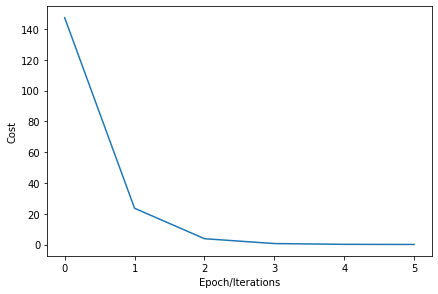

In [154]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

# batch gradient descent

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# The class for plot the diagram

class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples=30, go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis',
                                                   edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [5]:
# Set random seed

torch.manual_seed(1)

In [6]:
# Setup the actual data and simulated data

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

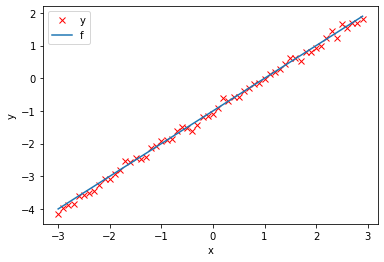

In [7]:
# Plot out the data dots and line

plt.plot(X.numpy(), Y.numpy(), 'rx', label='y')
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [8]:
# Define the forward function

def forward(x):
    return w * x + b

In [9]:
# Define the MSE Loss function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

<Figure size 432x288 with 0 Axes>

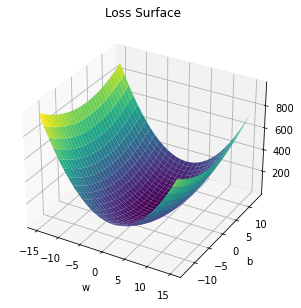

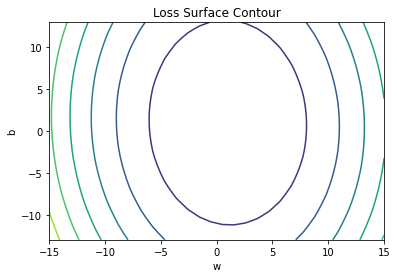

In [11]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(w_range = 15, b_range = 13, X = X, Y = Y, n_samples = 30)

In [12]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

In [13]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS_BGD = []

In [14]:
# The function for training the model

def train_model(iter):
    # Loop
    for epoch in range(iter):
        # make a prediction
        Yhat = forward(X)

        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()

        # store the loss in the list LOSS_BGD
        LOSS_BGD.append(loss)

        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()

        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data

        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

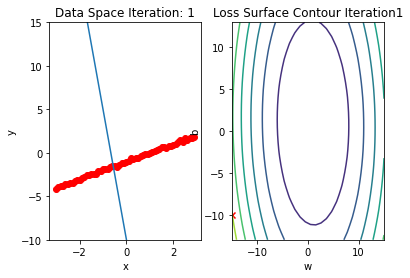

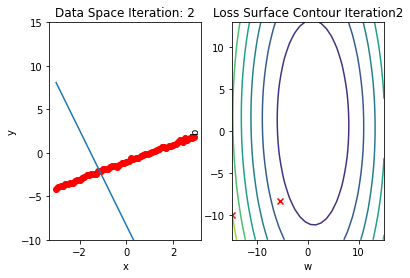

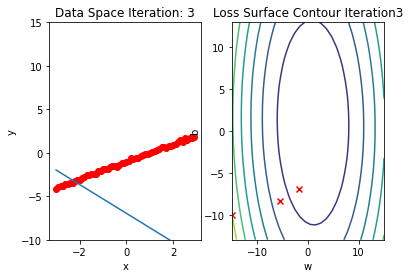

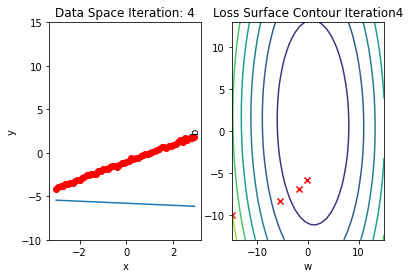

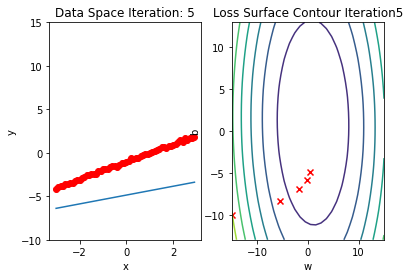

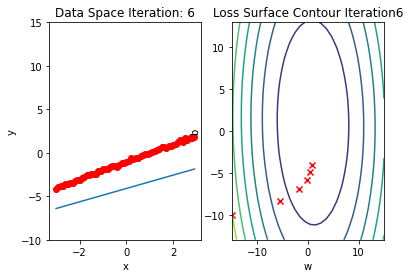

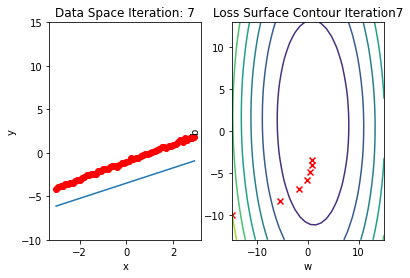

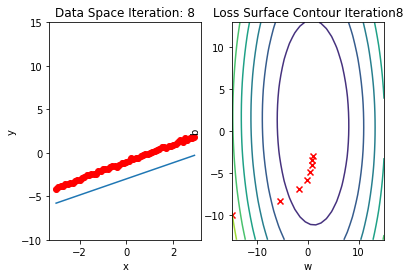

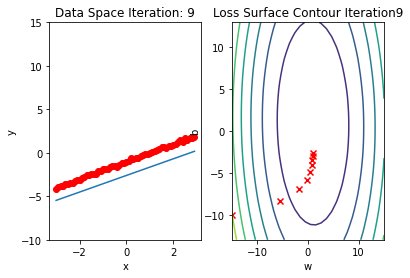

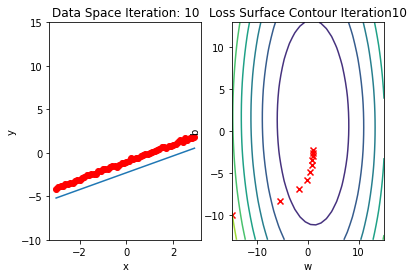

In [15]:
# Train the model with 10 iterations

train_model(10)

# stochastic gradient descent

In [17]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go=False)

In [18]:
# The function for training the model

LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)


def train_model_SGD(iter):
    # Loop
    for epoch in range(iter):

        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)

        # store the loss 
        LOSS_SGD.append(criterion(Yhat, Y).tolist())

        for x, y in zip(X, Y):
            # make a pridiction
            yhat = forward(x)

            # calculate the loss 
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())

            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()

            # update parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()

        #plot surface and data space after each epoch    
        get_surface.plot_ps()

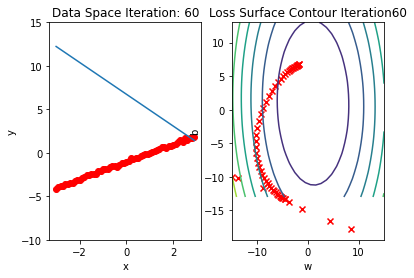

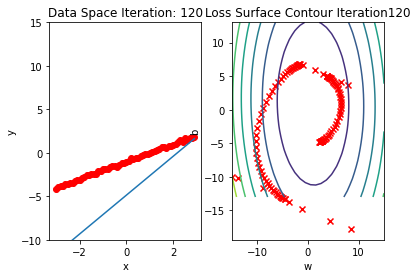

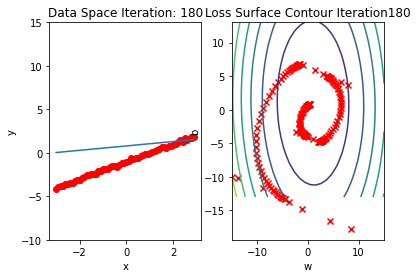

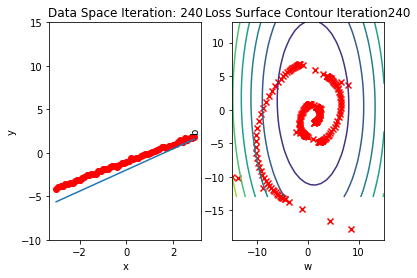

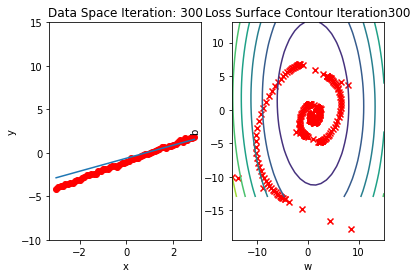

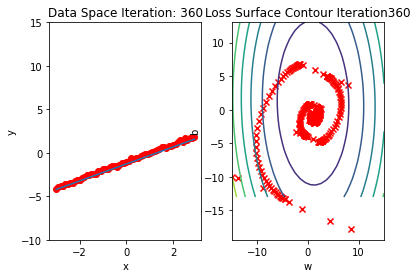

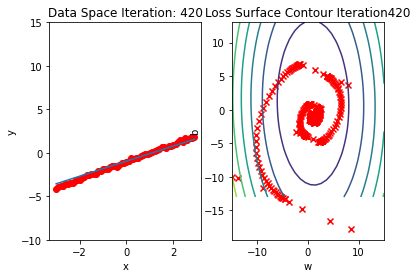

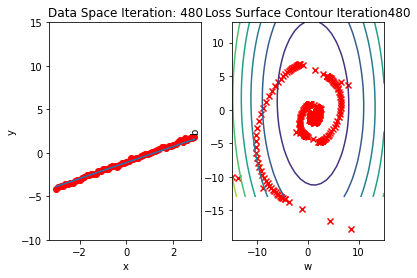

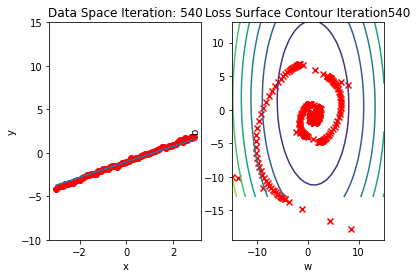

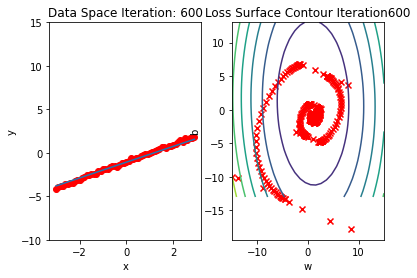

In [19]:
# Train the model with 10 iterations

train_model_SGD(10)

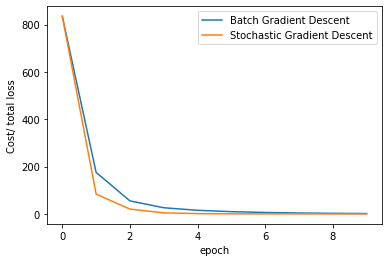

In [20]:
# Plot out the LOSS_BGD and LOSS_SGD

plt.plot(torch.tensor(LOSS_BGD).numpy(), label="Batch Gradient Descent")
plt.plot(torch.tensor(LOSS_SGD).numpy(), label="Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

# pytorch way

In [42]:
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

In [43]:
# class for ploting  

class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples=30, go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis',
                                                   edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram    
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [44]:
# Create Data Class

class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [45]:
# Create dataset object

dataset = Data()

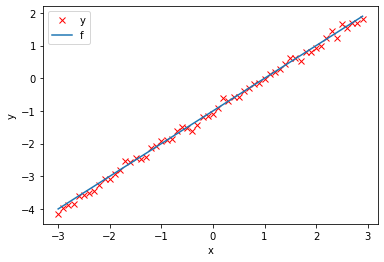

In [46]:
# Plot the data

plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label='y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [47]:
# Create a linear regression model class

from torch import nn, optim


class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [48]:
# Build in cost function

criterion = nn.MSELoss()

In [49]:
# Create optimizer

model = linear_regression(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [50]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3636]], requires_grad=True),
 Parameter containing:
 tensor([0.4957], requires_grad=True)]

In [51]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'params': [0, 1]}]}

In [52]:
# Create Dataloader object

trainloader = DataLoader(dataset=dataset, batch_size=1)

In [53]:
# Customize the weight and bias

model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

In [54]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-15.]])),
             ('linear.bias', tensor([-10.]))])

In [55]:
# Create plot surface object

get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go=False)

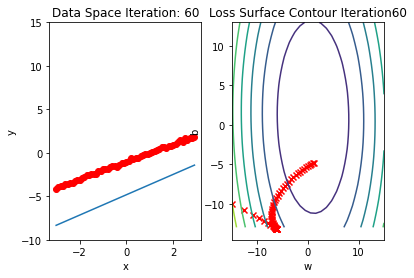

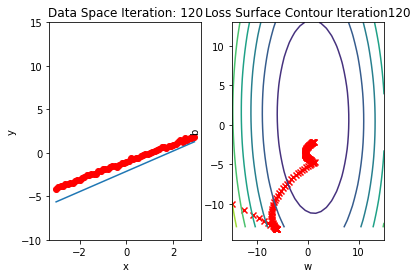

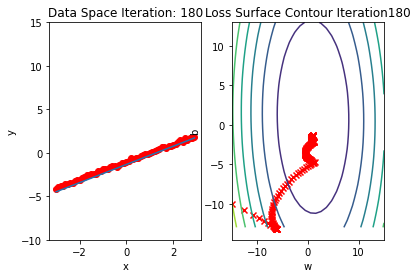

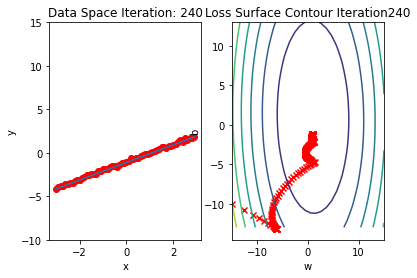

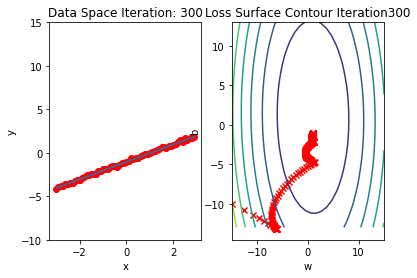

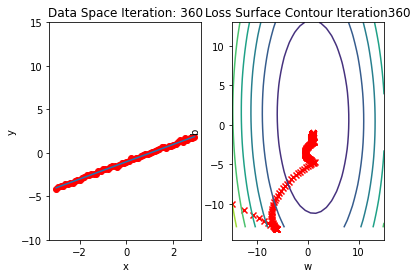

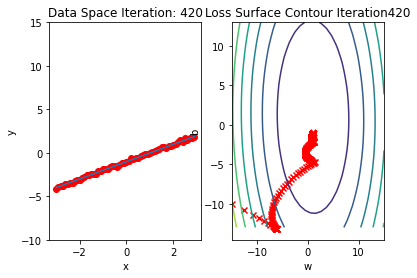

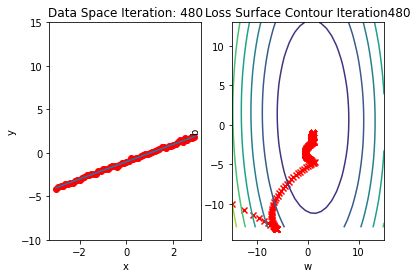

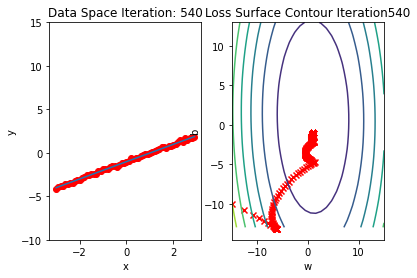

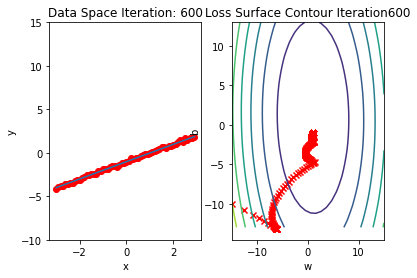

In [56]:
# Train Model

def train_model_BGD(iter):
    for epoch in range(iter):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist())
            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
        get_surface.plot_ps()


train_model_BGD(10)

In [57]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.9932]])),
             ('linear.bias', tensor([-1.0174]))])

# Question

In [ ]:
import torch
X = torch.arange(-3, 3, step=0.1)
Y = X * 3
Y += 0.1 * torch.randn(Y.shape)

def my_train_model(iter):
    w = torch.tensor(-15.0, requires_grad=True)
    lr = 0.1
    for epoch in range(iter):
        print(w.grad)
        yhat = w * X
        loss = torch.mean((yhat - Y) ** 2)
        loss.backward()

        with torch.no_grad():
            print(w.grad)
            w = w - lr * w.grad
            print(w.grad)
            w.grad.zero_()
        print(loss)

my_train_model(4)